<a href="https://colab.research.google.com/github/AudePertron/chromosomes/blob/main/chroms_regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/chromos/base_donnees'

/content/gdrive/MyDrive/chromos/base_donnees


In [ ]:
import cv2
from skimage.io import imread, imshow

In [ ]:
#image = cv2.imread('/content/gdrive/MyDrive/chromos/base_donnees/chr_melanges/1.png')
from skimage import io
from skimage import data
from skimage import feature
from skimage import segmentation
import matplotlib.pyplot as plt

image_coins = cv2.imread('/content/gdrive/MyDrive/chromos/base_donnees/chr_melanges/0.png', 0)
image_edges = feature.canny(image_coins, sigma =3.5)
image = segmentation.mark_boundaries(image_coins, image_edges, color=( 250, 0, 0 ), outline_color=(0,0,250))

plt.figure(figsize = (50,50))
# plt.imshow(image, interpolation='nearest')

# io.show()

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

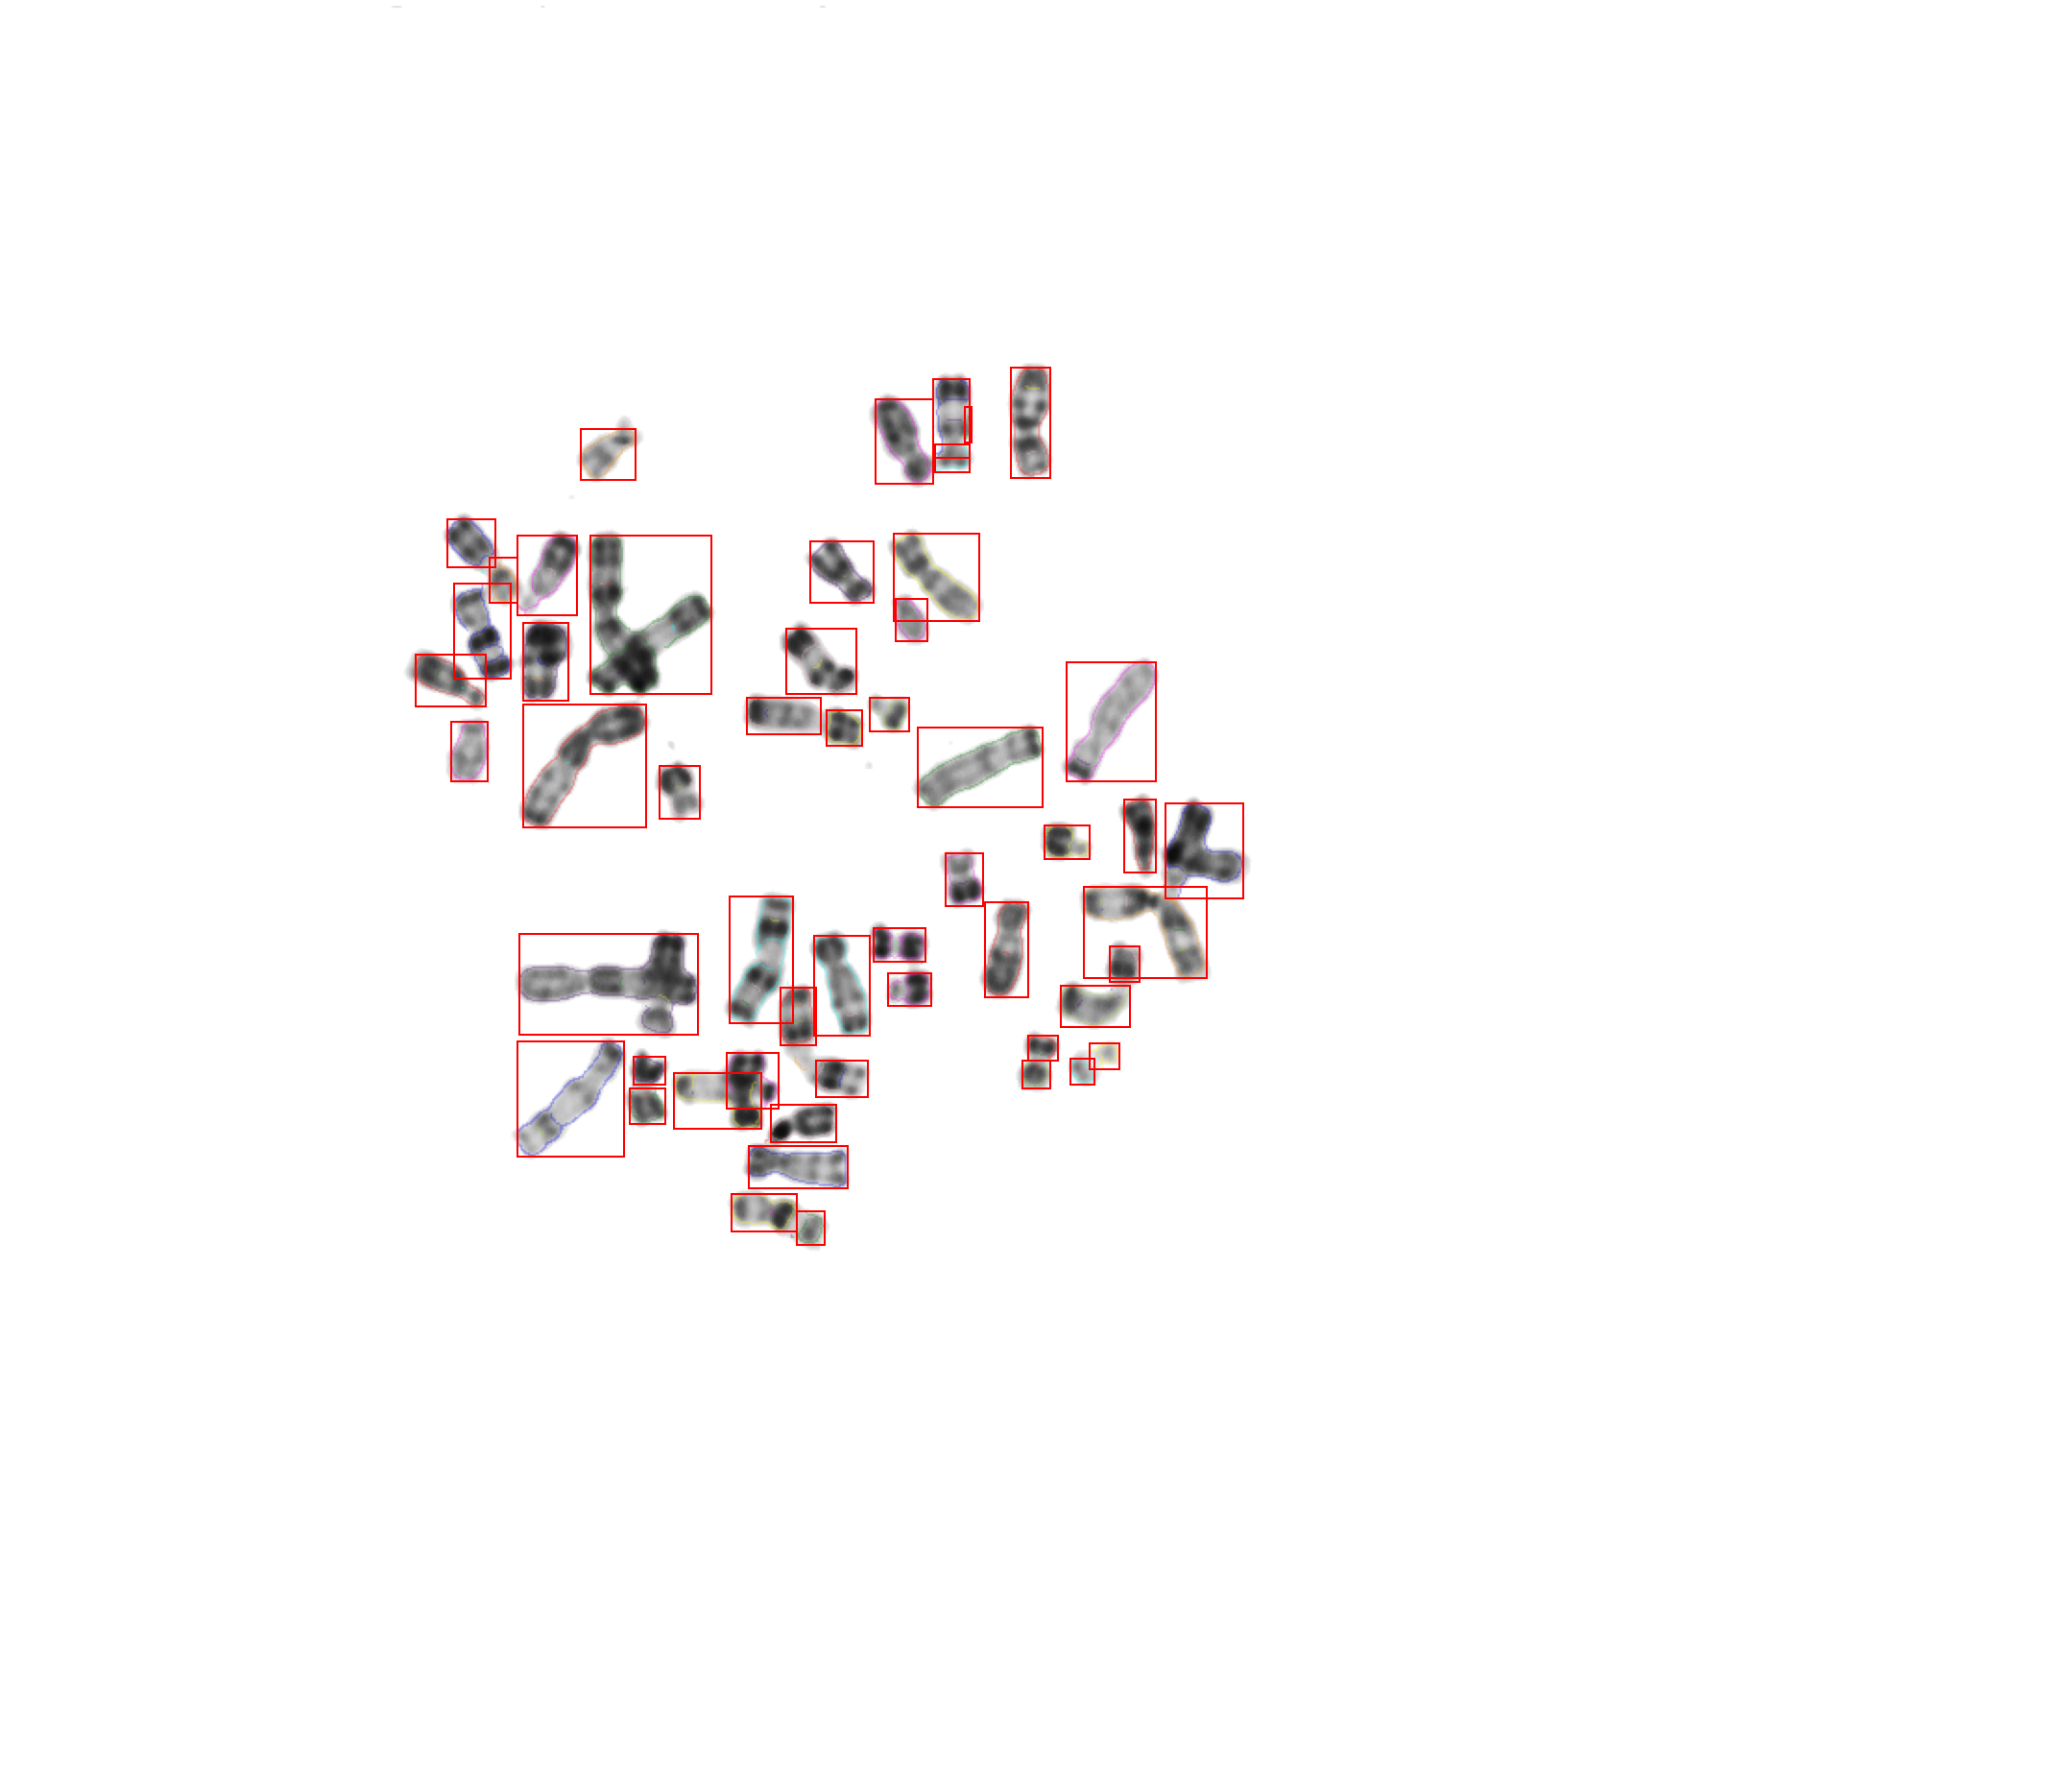

In [ ]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.patches as mpatches


label_image = label(image_edges)
image = cv2.imread('/content/gdrive/MyDrive/chromos/base_donnees/chr_melanges/0.png', 0)

image_label_overlay = label2rgb(label_image, image=image, bg_label=0, bg_color=None)

fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(image_label_overlay)
lst_areas = []
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 20:
        lst_areas.append(region.bbox)
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
#write single chromos
OUTPUT_FOLDER = '/content/gdrive/MyDrive/chromos/base_donnees/outputs/'
for i in range(len(lst_areas)):
    roi = image[(lst_areas[i][0]):(lst_areas[i][2]), (lst_areas[i][1]):(lst_areas[i][3])]
    cv2.imwrite(f"{OUTPUT_FOLDER}roi{i}.jpg", roi)